In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import scipy.integrate
import astropy.units as u
import GCRCatalogs
import pandas as pd

%matplotlib inline

try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

import sys
import math
import matplotlib.pyplot as plt
from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

catalog = 'skysim5000_v1.1.1_image'
skysim_cat = GCRCatalogs.load_catalog(catalog)
cosmo_ss  = skysim_cat.cosmology



from astropy.io import fits
from astropy.table import Table


In [9]:
def add_mcat(c, mcat, name):
    nwalkers = mcat.nchains ()
    m2lnL = mcat.get_m2lnp_var ()

    # Use nwalkers * 10 as burning length
    burn = nwalkers * burnin
    rows = np.array ([mcat.peek_row (i).dup_array () for i in range (burn, mcat.len ())])
    params = ["$" + mcat.col_symb (i) + "$" for i in range (mcat.ncols ())]

    posterior = -0.5 * rows[:,m2lnL]

    rows   = np.delete (rows,   m2lnL, 1)
    params = np.delete (params, m2lnL, 0)

    indices = [0,1]

    rows   = rows[:,indices]
    params = params[indices]

    c.add_chain(rows, posterior = posterior, parameters=list(params), name=name)

[0.8, 0.2648, 3.19]


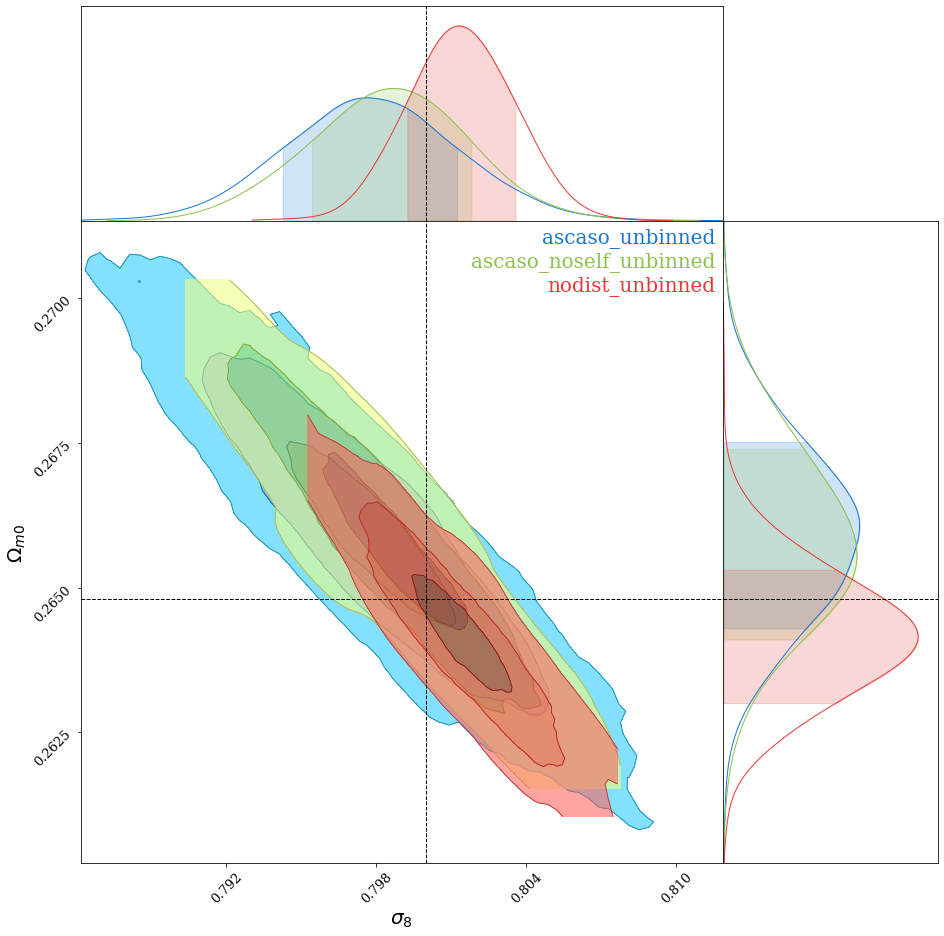

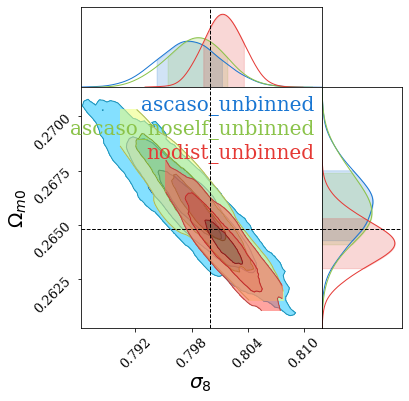

In [13]:
nwalkers = 300
burnin   = 30

mcat_nodist_unbinned = Ncm.MSetCatalog.new_from_file_ro ('../mcmc_nodist_unbinned.fits', nwalkers * burnin)
mcat_nodist_binned = Ncm.MSetCatalog.new_from_file_ro ('../mcmc_nodist_binned.fits', nwalkers * burnin)


mcat_ascaso_unbinned = Ncm.MSetCatalog.new_from_file_ro ('../mcmc_ascaso_unbinned.fits', nwalkers * burnin)
mcat_ascaso_binned = Ncm.MSetCatalog.new_from_file_ro ('../mcmc_ascaso_binned.fits', nwalkers * burnin)

mcat_ascaso_noself_unbinned = Ncm.MSetCatalog.new_from_file_ro ('../mcmc_ascaso_unbinned_noself.fits', nwalkers * burnin)
mcat_ascaso_noself_binned = Ncm.MSetCatalog.new_from_file_ro ('../mcmc_ascaso_binned_noself.fits', nwalkers * burnin)


from chainconsumer import ChainConsumer

c = ChainConsumer()

#add_mcat(c, mcat_ascaso_binned, 'ascaso_binned')
add_mcat(c, mcat_ascaso_unbinned, 'ascaso_unbinned')

#add_mcat(c, mcat_ascaso_noself_binned, 'ascaso_noself_binned')
add_mcat(c, mcat_ascaso_noself_unbinned, 'ascaso_noself_unbinned')


#add_mcat(c, mcat_nodist_binned, 'nodist_binned')
add_mcat(c, mcat_nodist_unbinned, 'nodist_unbinned')

c.configure (kde = True, label_font_size=20, sigma2d=True, sigmas = [1, 2,3], spacing = 0.0, tick_font_size=13, usetex=False)


plot_args = {}
plot_args['truth'] = [0.8,cosmo_ss.Odm0+cosmo_ss.Ob0,3.19]
print(plot_args['truth'])    
plot_name = 'mcmc_nodist.png'
fig = c.plotter.plot(**plot_args)
c.plotter.plot(filename=plot_name, figsize=1.75, **plot_args)
fig.set_size_inches(14.0, 14.0)

In [4]:
#ascaso_noself unbinned sigma_8 = 0.798 +- 0.003 omega_m0 = 0.265 +- 0.002
#ascaso unbinned sigma_8 = 0.797 +- 0.004 omega_m0 = 0.266 +- 0.002 mu_0 = 3.191 +- 0.005
#nodist unbinned sigma_8 = 0.801 +- 0.002 omega_m0 = 0.264 +- 0.001


#ascaso_noself binned sigma_8 = 0.799 +- 0.004 omega_m0 = 0.265 +- 0.002
#ascaso binned sigma_8 = 0.798 +- 0.004 omega_m0 = 0.265 +- 0.002 mu_0 = 3.192 +- 0.005
#nodist binned sigma_8 = 0.800 +- 0.003 omega_m0 = 0.264 +- 0.001